In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import functions as F
from functools import reduce
from pyspark.sql import DataFrame
from pyspark.mllib.evaluation import MulticlassMetrics

In [0]:
store_blob_url = f"dbfs:/FileStore/shared_uploads/lingyue@berkeley.edu"
# data = spark.read.parquet(f"{store_blob_url}/modelData")
data = spark.read.parquet(f"{store_blob_url}/data_with_rank_2")
down_sampled_df = spark.read.parquet(f"{store_blob_url}/down_sampled_data")

In [0]:
data.display()

DepartureUTC,YEAR,QUARTER,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ELAPSED_TIME,DEST_AIRPORT_ID,ORIGIN_AIRPORT_ID,OP_CARRIER_FL_NUM,CRS_ARR_TIME,countDelaySameAirportDay,Holiday_Flag,Holiday_Flag_3dayrange,DEP_DELAY,avg_DryBulbTemp,avg_RelativeHumidity,avg_Visibility,avg_WindDirection,avg_WindSpeed,OP_UNIQUE_CARRIERIndex,ORIGIN_PAGERANK,DEST_PAGERANK
2019-01-01T00:55:00.000+0000,2018,4,1,1655,109.0,12892,14570,5792,1844,1,1,1,-2.0,30.8,47.666666666666664,9.991999999999999,80.0,6.266666666666667,3.0,0.0020822518552488034,0.02293484487171881
2019-01-01T07:59:00.000+0000,2018,4,1,2359,305.0,12478,14570,80,804,0,1,1,161.0,30.608695652173914,46.391304347826086,9.992173913043478,73.47826086956522,7.913043478260869,5.0,0.0020822518552488034,0.014018428717798065
2019-01-01T01:35:00.000+0000,2018,4,1,1735,70.0,12889,14570,1399,1845,1,1,1,0.0,31.0,47.0625,9.9925,77.5,6.8125,0.0,0.0020822518552488034,0.015076685716703826
2019-01-01T01:00:00.000+0000,2018,4,1,1700,90.0,14679,14570,2022,1830,1,1,1,10.0,31.0,47.0625,9.9925,77.5,6.8125,0.0,0.0020822518552488034,0.009109663787577613
2019-01-01T00:52:00.000+0000,2018,4,1,1652,88.0,14869,14570,3776,1920,1,1,1,30.0,30.8,47.666666666666664,9.991999999999999,80.0,6.266666666666667,3.0,0.0020822518552488034,0.017613561112223355
2019-01-01T02:30:00.000+0000,2018,4,1,1830,65.0,14831,14570,3416,1935,1,1,1,-2.0,31.22222222222222,46.05555555555556,9.99,74.44444444444444,7.611111111111111,3.0,0.0020822518552488034,0.005507974766573155
2019-01-01T03:55:00.000+0000,2018,4,1,1955,80.0,14771,14570,5267,2115,1,1,1,-14.0,31.210526315789473,45.73684210526316,9.990526315789474,74.21052631578948,7.684210526315789,3.0,0.0020822518552488034,0.019552200758023434
2019-02-14T21:25:00.000+0000,2019,1,4,1325,82.0,12954,14570,43,1447,10,1,1,72.0,43.96,83.92,6.1484000000000005,126.0,7.4,5.0,0.0020822518552488034,0.0020020815556818197
2019-02-14T19:05:00.000+0000,2019,1,4,1105,75.0,12889,14570,2278,1220,15,1,1,69.0,44.26315789473684,85.05263157894737,5.946315789473684,95.26315789473684,6.2105263157894735,0.0,0.0020822518552488034,0.015076685716703826
2019-02-14T22:25:00.000+0000,2019,1,4,1425,195.0,11298,14570,1223,1940,9,1,1,16.0,43.84615384615385,83.61538461538461,6.296538461538462,121.53846153846153,7.346153846153846,2.0,0.0020822518552488034,0.0420756633037703


In [0]:
featCol = [
 'YEAR',
 'QUARTER',
 'DAY_OF_WEEK',
 'CRS_DEP_TIME',
 'CRS_ELAPSED_TIME',
 'DEST_AIRPORT_ID',
 'ORIGIN_AIRPORT_ID',
 'OP_CARRIER_FL_NUM',
 'CRS_ARR_TIME',
 'countDelaySameAirportDay',
 'Holiday_Flag',
 'Holiday_Flag_3dayrange',
 'avg_DryBulbTemp',
 'avg_RelativeHumidity',
 'avg_Visibility',
 'avg_WindDirection',
 'avg_WindSpeed', 
 'OP_UNIQUE_CARRIERIndex',
 'ORIGIN_PAGERANK',
 'DEST_PAGERANK']

In [0]:
# add the dep_15 col

data = data.withColumn('DEP_DELAY15', F.when(F.col('DEP_DELAY')>=15, 1)
    .otherwise(0))

In [0]:
assemble = VectorAssembler(inputCols=featCol, outputCol='features')
mlp_input = assemble.transform(data) \
                   .withColumnRenamed('DEP_DELAY15', 'label') \
                   .cache()

# sanity check
# display(mlp_input)

In [0]:
len(featCol)

Out[10]: 20

The hidden layers use the sigmoid activation function while the output layer uses the softmax activation function to calculate the outputs. The logistic loss function is used for the optimization of the weights and biases during back-prop learning. The number of inputs provided is equal to the features vectors and the number of outputs equal to the total labels.

## Grid Search

In [0]:
# create cv partition
d = {}
for year in range(2015, 2021, 1):
    for quarter in range(2, 5):
        d['df_{}_q{}'.format(year, quarter)] = mlp_input.filter((mlp_input.YEAR == year)& (mlp_input.QUARTER <= quarter) | (mlp_input.YEAR < year))\
        .withColumn('cv', F.when((mlp_input.YEAR == year) & (mlp_input.QUARTER == quarter), 'test').otherwise('train'))

In [0]:
%run "/Shared/custom_cv"

Down Sampling

In [0]:
mlp_input.where(mlp_input..groupby('label').agg(
    (F.count('label')).alias('count'),
    (F.count('label') / mlp_input.count()).alias('percentage')
).toPandas()

,label,count,percentage
0,1,7002421,0.171719
1,0,33776036,0.828281


In [0]:
dfs = []
for year in range(2015, 2021):
    for quarter in range(1, 5):
        df = mlp_input.where((mlp_input.YEAR == year) & (mlp_input.QUARTER == quarter)).groupby('label').agg(
            (F.first('YEAR')),
            (F.first('QUARTER')),
            (F.count('label')).alias('count'),
            (F.count('label') /mlp_input.where((mlp_input.YEAR == 2015) & (mlp_input.QUARTER == 1)).count()).alias('percentage')
        )
        dfs.append(df)

In [0]:
ratio_df = reduce(DataFrame.unionAll, dfs).toPandas()

In [0]:
dfs = []
for year in range(2015, 2021):
    for quarter in range(1, 5):
        frac = ratio_df.loc[(ratio_df['first(YEAR)'] == year) & (ratio_df['first(QUARTER)'] == quarter) & (ratio_df.label==1), 'percentage'].values[0]
        df1 = mlp_input.where((mlp_input.YEAR == year) & (mlp_input.QUARTER == quarter) & (mlp_input.label==1))
        df2 = mlp_input.where((mlp_input.YEAR == year) & (mlp_input.QUARTER == quarter)& (mlp_input.label==0)).sample(withReplacement = False, fraction = frac, seed = 3)
        dfs.append(df1)
        dfs.append(df2)

In [0]:
down_sampled_df = reduce(DataFrame.unionAll, dfs)

In [0]:
# Check the percentage of the labels in the downsampled dataset
down_sampled_df.groupby('label').agg(
    (F.count('label')).alias('count'),
    (F.count('label') / down_sampled_df.count()).alias('percentage')
).toPandas()

,label,count,percentage
0,0,5665902,0.485497
1,1,6004408,0.514503


In [0]:
down_sampled_df.write.mode("overwrite").parquet(f"{store_blob_url}/down_sampled_data")

Hyper parameter Tunning

Experiment 1: Setting the number of iteration to 500 can cause overfitting and the model only returns zero

In [0]:

mlp = MultilayerPerceptronClassifier(maxIter=500, layers = [20, 10, 5, 2], solver='gd', seed=1234)

In [0]:
test = mlp_input.filter(mlp_input.YEAR == 2021)
result = mlp_cv.transform(test)
predictions = result.select("prediction", "label")

In [0]:
predictions.groupBy('prediction').count().show()

+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0|5745725|
+----------+-------+



In [0]:
print('F1:', evaluator.evaluate(predictions))

F1: 0.7477150685214906


In [0]:
test.groupBy('label').count().show()

+-----+-------+
|label|  count|
+-----+-------+
|    1| 998013|
|    0|4747712|
+-----+-------+



Experiment2: Running mlpc model with the gradient boost

In [0]:
mlp = MultilayerPerceptronClassifier(maxIter=100, layers = [20, 10, 5, 2], solver='gd', seed=1234)
model2 = mlp.fit(down_sampled_df)

In [0]:
test = mlp_input.filter(mlp_input.YEAR == 2021)
result = model2.transform(test)
predictions = result.select("prediction", "label")

In [0]:
predictions.groupBy('prediction').count().show()

+----------+------+
|prediction| count|
+----------+------+
|       0.0|253176|
|       1.0|486088|
+----------+------+



In [0]:
print('F1:', evaluator.evaluate(predictions))

F1: 0.5183774514432129


Run grid search on smaller sample

In [0]:
d = {}
for year in range(2015, 2016, 1):
    for quarter in range(2, 5):
        d['df_{}_q{}'.format(year, quarter)] = down_sampled_df.filter((down_sampled_df.YEAR == year)& (down_sampled_df.QUARTER <= quarter) | (down_sampled_df.YEAR < year))\
        .withColumn('cv', F.when((down_sampled_df.YEAR == year) & (down_sampled_df.QUARTER == quarter), 'test').otherwise('train'))

In [0]:
mlp = MultilayerPerceptronClassifier(maxIter=100, layers = [20, 10, 5, 2], solver='gd', seed=1234)

grid = ParamGridBuilder()\
            .addGrid(mlp.layers, [[20, 10, 5, 2], [20, 10, 2]])\
            .build()

# evaluator will be from here: https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1")


In [0]:
mlp = MultilayerPerceptronClassifier(layers = [20, 10, 5, 2], solver='gd', seed=1234)
#[0.000001, 0.00001, 0.0001]
grid = ParamGridBuilder()\
            .addGrid(mlp.tol, [0.00001, 0.000001, 0.0000001])\
            .build()

# evaluator will be from here: https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1")


In [0]:
cv = CustomCrossValidator(estimator=mlp, estimatorParamMaps=grid, evaluator=evaluator,
     splitWord = ('train', 'test'), cvCol = 'cv', parallelism=4)

mlp_cv = cv.fit(d)

fold 1 start...
fold 1 end
fold 2 start...
fold 2 end
fold 3 start...
fold 3 end
Best Model:  {Param(parent='MultilayerPerceptronClassifier_340e64527a72', name='tol', doc='the convergence tolerance for iterative algorithms (>= 0).'): 1e-06} Detailed Score [0.5167581131990624, 0.5485772571279205, 0.4485428841028604] Avg Score 0.5046260848099478


In [0]:
test = mlp_input.filter(mlp_input.YEAR == 2021)
result = mlp_cv.transform(test)
predictions = result.select("prediction", "label")

In [0]:
predictions.groupBy('prediction').count().show()
print('F1:', evaluator.evaluate(predictions))

+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0| 457291|
|       1.0|5288434|
+----------+-------+

F1: 0.1789818564873


In [0]:
mlp = MultilayerPerceptronClassifier(layers = [20, 10, 5, 2], solver='gd', seed=1234)
#[0.000001, 0.00001, 0.0001]
grid = ParamGridBuilder()\
            .addGrid(mlp.maxIter, [100, 200])\
            .build()

# evaluator will be from here: https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1")

In [0]:
cv = CustomCrossValidator(estimator=mlp, estimatorParamMaps=grid, evaluator=evaluator,
     splitWord = ('train', 'test'), cvCol = 'cv', parallelism=4)

mlp_cv = cv.fit(d)

fold 1 start...
fold 1 end
fold 2 start...
fold 2 end
fold 3 start...
fold 3 end
Best Model:  {Param(parent='MultilayerPerceptronClassifier_e1492654a5ac', name='maxIter', doc='max number of iterations (>= 0).'): 100} Detailed Score [0.5162485873692316, 0.5455582967361813, 0.4485428841028604] Avg Score 0.5034499227360911


In [0]:
test = mlp_input.filter(mlp_input.YEAR == 2021)
result = mlp_cv.transform(test)
predictions = result.select("prediction", "label")
predictions.groupBy('prediction').count().show()
print('F1:', evaluator.evaluate(predictions))

+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0| 327619|
|       1.0|5418106|
+----------+-------+

F1: 0.14552029490098894


In [0]:

mlp = MultilayerPerceptronClassifier(maxIter = 100, layers = [20, 10, 5, 2], solver='gd', seed=1234)
#[0.000001, 0.00001, 0.0001]
grid = ParamGridBuilder()\
            .addGrid(mlp.stepSize, [0.02, 0.03, 0.04])\
            .build()

# evaluator will be from here: https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1")

In [0]:
cv = CustomCrossValidator(estimator=mlp, estimatorParamMaps=grid, evaluator=evaluator,
     splitWord = ('train', 'test'), cvCol = 'cv', parallelism=4)

mlp_cv = cv.fit(d)
test = mlp_input.filter(mlp_input.YEAR == 2021)
result = mlp_cv.transform(test)
predictions = result.select("prediction", "label")
predictions.groupBy('prediction').count().show()
print('F1:', evaluator.evaluate(predictions))

fold 1 start...
fold 1 end
fold 2 start...
fold 2 end
fold 3 start...
fold 3 end
Best Model:  {Param(parent='MultilayerPerceptronClassifier_2ef857aba1db', name='stepSize', doc='Step size to be used for each iteration of optimization (>= 0).'): 0.03} Detailed Score [0.5134044544750318, 0.5457492994042628, 0.4562798900030755] Avg Score 0.5051445479607901
+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0| 452216|
|       1.0|5293509|
+----------+-------+

F1: 0.17770835770575083


In [0]:

mlp = MultilayerPerceptronClassifier(maxIter = 100, layers = [20, 10, 5, 2], seed=1234)
#[0.000001, 0.00001, 0.0001]
grid = ParamGridBuilder()\
            .addGrid(mlp.solver, [ 'l-bfgs', 'gd'])\
            .build()

# evaluator will be from here: https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1")

In [0]:
cv = CustomCrossValidator(estimator=mlp, estimatorParamMaps=grid, evaluator=evaluator,
     splitWord = ('train', 'test'), cvCol = 'cv', parallelism=4)

mlp_cv = cv.fit(d)
test = mlp_input.filter(mlp_input.YEAR == 2021)
result = mlp_cv.transform(test)
predictions = result.select("prediction", "label")
predictions.groupBy('prediction').count().show()
print('F1:', evaluator.evaluate(predictions))

fold 1 start...
fold 1 end
fold 2 start...
fold 2 end
fold 3 start...
fold 3 end
Best Model:  {Param(parent='MultilayerPerceptronClassifier_aa1c129ff376', name='solver', doc='The solver algorithm for optimization. Supported options: l-bfgs, gd.'): 'l-bfgs'} Detailed Score [0.589523889488657, 0.6014787425369345, 0.5744502348530534] Avg Score 0.5884842889595483
+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0|1790942|
|       1.0|3954783|
+----------+-------+

F1: 0.4659291334915978


In [0]:

mlp = MultilayerPerceptronClassifier(maxIter = 100, solver='l-bfgs', layers = [20, 10, 5, 2], seed=1234)
#[0.000001, 0.00001, 0.0001]
grid = ParamGridBuilder()\
            .addGrid(mlp.blockSize, [ 128, 64, 256])\
            .build()

# evaluator will be from here: https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1")

In [0]:
cv = CustomCrossValidator(estimator=mlp, estimatorParamMaps=grid, evaluator=evaluator,
     splitWord = ('train', 'test'), cvCol = 'cv', parallelism=4)

mlp_cv = cv.fit(d)
test = mlp_input.filter(mlp_input.YEAR == 2021)
result = mlp_cv.transform(test)
predictions = result.select("prediction", "label")
predictions.groupBy('prediction').count().show()
print('F1:', evaluator.evaluate(predictions))

fold 1 start...
fold 1 end
fold 2 start...
fold 2 end
fold 3 start...
fold 3 end
Best Model:  {Param(parent='MultilayerPerceptronClassifier_c23d56103857', name='blockSize', doc='block size for stacking input data in matrices. Data is stacked within partitions. If block size is more than remaining data in a partition then it is adjusted to the size of this data.'): 64} Detailed Score [0.5935181305151943, 0.5976032542544792, 0.5949354801080825] Avg Score 0.5953522882925854
+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0|2138005|
|       1.0|3607720|
+----------+-------+

F1: 0.5164225228869976


The model with a solver set to l-bgfs and block Size of 64 was the best mlp model

In [0]:
mlp = MultilayerPerceptronClassifier(maxIter = 100, solver='l-bfgs', layers = [20, 10, 5, 2], blockSize=64, seed=1234)

In [0]:
model3 = mlp.fit(down_sampled_df)

In [0]:
model3.save(f"{store_blob_url}/mlp_model3")

In [0]:
test = mlp_input.filter(mlp_input.YEAR == 2021)
result = model3.transform(test)
predictions = result.select("prediction", "label")
predictions.groupBy('prediction').count().show()
print('F1:', evaluator.evaluate(predictions))

+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0|2226802|
|       1.0|3518923|
+----------+-------+

F1: 0.5315336596751473


Experiment4: Grid search with more params

In [0]:
mlp = MultilayerPerceptronClassifier(layers = [20, 10, 5, 2], seed=1234)
#[0.000001, 0.00001, 0.0001]
grid = ParamGridBuilder()\
            .addGrid(mlp.blockSize, [ 128, 64, 32])\
            .addGrid(mlp.solver, [ 'l-bfgs', 'gd'])\
            .addGrid(mlp.stepSize, [0.02, 0.03])\
            .addGrid(mlp.tol, [0.000001, 0.00000001])\
            .addGrid(mlp.maxIter, [100, 150])\
            .build()

# evaluator will be from here: https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1")

In [0]:
cv = CustomCrossValidator(estimator=mlp, estimatorParamMaps=grid, evaluator=evaluator,
     splitWord = ('train', 'test'), cvCol = 'cv', parallelism=4)

mlp_cv = cv.fit(d)
test = mlp_input.filter(mlp_input.YEAR == 2021)
result = mlp_cv.transform(test)
predictions = result.select("prediction", "label")
predictions.groupBy('prediction').count().show()
print('F1:', evaluator.evaluate(predictions))

fold 1 start...
fold 1 end
fold 2 start...
fold 2 end
fold 3 start...
fold 3 end
Best Model:  {Param(parent='MultilayerPerceptronClassifier_ae4bdfd7db28', name='blockSize', doc='block size for stacking input data in matrices. Data is stacked within partitions. If block size is more than remaining data in a partition then it is adjusted to the size of this data.'): 128, Param(parent='MultilayerPerceptronClassifier_ae4bdfd7db28', name='solver', doc='The solver algorithm for optimization. Supported options: l-bfgs, gd.'): 'l-bfgs', Param(parent='MultilayerPerceptronClassifier_ae4bdfd7db28', name='stepSize', doc='Step size to be used for each iteration of optimization (>= 0).'): 0.02, Param(parent='MultilayerPerceptronClassifier_ae4bdfd7db28', name='tol', doc='the convergence tolerance for iterative algorithms (>= 0).'): 1e-06, Param(parent='MultilayerPerceptronClassifier_ae4bdfd7db28', name='maxIter', doc='max number of iterations (>= 0).'): 150} Detailed Score [0.6031449613585713, 0.6049

In [0]:
mlp = MultilayerPerceptronClassifier(maxIter = 150, solver='l-bfgs', layers = [20, 10, 5, 2], blockSize=128, stepSize=0.02, seed=1234)
model4 = mlp.fit(down_sampled_df)

In [0]:
model4.save(f"{store_blob_url}/mlp_model4")

Increasing max iteration decreased the performance of the model on test set. It shows overfitting

In [0]:
test = mlp_input.filter(mlp_input.YEAR == 2021)
result = model4.transform(test)
predictions = result.select("prediction", "label")
predictions.groupBy('prediction').count().show()
print('F1:', evaluator.evaluate(predictions))

+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0|2065370|
|       1.0|3680355|
+----------+-------+

F1: 0.5086422840154696


Confusion Matrix

In [0]:
test = mlp_input.filter(mlp_input.YEAR == 2021)
result = model3.transform(test)
predictions = result.select("prediction", "label")
predictions.groupBy('prediction').count().show()
print('F1:', evaluator.evaluate(predictions))

+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0|2226802|
|       1.0|3518923|
+----------+-------+

F1: 0.5315336596751473


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, title):
    # Clear Plot
    plt.gcf().clear()

    # Configure figure
    fig = plt.figure(1)

    # Configure plot
    classes = [1, 0]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Normalize and establish threshold
    normalize=False
    fmt = 'd'
    thresh = cm.max() / 2.

    # Iterate through the confusion matrix cells
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")

    # Final plot configurations
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

    # Display images
    image = fig

    # Show plot
    #fig = plt.show()

    # Save plot
    fig.savefig("confusion-matrix.png")

    # Display Plot
    display(image)

    # Close Plot
    plt.close(fig)

In [0]:
test_pred_cmdf = spark.sql("select label, prediction, count(1) as count from test_pred group by label, prediction")
display(test_pred_cmdf)

label,prediction,count
1,0.0,232149
0,0.0,1994653
1,1.0,765864
0,1.0,2753059


In [0]:
cm_array = np.array([[232149, 1994653], [765864, 2753059]])

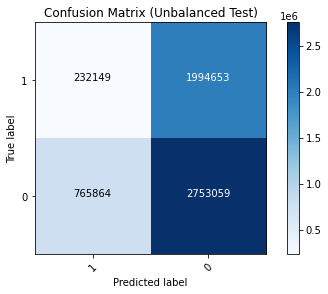

In [0]:
plot_confusion_matrix(cm_array, "Confusion Matrix (Unbalanced Test)")

In [0]:
df = result.withColumn(
    'ConfusionMatrix',
    F.when((F.col('label')==1) & (F.col('prediction')==0) , 'FN')\
    .when((F.col('label')==1) &( F.col('prediction')==1) , 'TP')\
    .when((F.col('label')==0) & (F.col('prediction')==0) , 'TN')\
    .otherwise('FP')
)


In [0]:
FN = result.where((result.label==1) & (result.prediction==0))
TP = result.where((result.label==1) & (result.prediction==1))
TN = result.where((result.label==0) & (result.prediction==0))
FP = result.where((result.label==0) & (result.prediction==1))

In [0]:
display(df)

DepartureUTC,YEAR,QUARTER,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ELAPSED_TIME,DEST_AIRPORT_ID,ORIGIN_AIRPORT_ID,OP_CARRIER_FL_NUM,CRS_ARR_TIME,countDelaySameAirportDay,Holiday_Flag,Holiday_Flag_3dayrange,DEP_DELAY,avg_DryBulbTemp,avg_RelativeHumidity,avg_Visibility,avg_WindDirection,avg_WindSpeed,OP_UNIQUE_CARRIERIndex,ORIGIN_PAGERANK,DEST_PAGERANK,label,features,rawPrediction,probability,prediction,ConfusionMatrix
2021-07-22T03:56:00.000+0000,2021,3,3,2056,74.0,12889,14570,106,2210,1,0,0,0.0,78.57894736842105,27.57894736842105,9.993684210526316,168.42105263157896,7.7368421052631575,15.0,0.002526893412083632,0.015386563261074841,0,"Map(vectorType -> dense, length -> 20, values -> List(2021.0, 3.0, 3.0, 2056.0, 74.0, 12889.0, 14570.0, 106.0, 2210.0, 1.0, 0.0, 0.0, 78.57894736842105, 27.57894736842105, 9.993684210526316, 168.42105263157896, 7.7368421052631575, 15.0, 0.002526893412083632, 0.015386563261074841))","Map(vectorType -> dense, length -> 2, values -> List(-0.28698902491083905, -0.11297611706838273))","Map(vectorType -> dense, length -> 2, values -> List(0.4566062165775858, 0.5433937834224142))",1.0,FP
2021-07-21T19:10:00.000+0000,2021,3,3,1210,90.0,14679,14570,4402,1340,8,0,0,-4.0,67.0,41.8,9.994,75.0,1.8,0.0,0.002526893412083632,0.007864213691442894,0,"Map(vectorType -> dense, length -> 20, values -> List(2021.0, 3.0, 3.0, 1210.0, 90.0, 14679.0, 14570.0, 4402.0, 1340.0, 8.0, 0.0, 0.0, 67.0, 41.8, 9.994, 75.0, 1.8, 0.0, 0.002526893412083632, 0.007864213691442894))","Map(vectorType -> dense, length -> 2, values -> List(-0.3373689283603077, 0.02502243467181805))","Map(vectorType -> dense, length -> 2, values -> List(0.4103808078946607, 0.5896191921053394))",1.0,FP
2021-07-21T14:10:00.000+0000,2021,3,3,710,60.0,13796,14570,1637,810,12,0,0,-2.0,64.16666666666667,46.0,9.99,125.0,3.0,0.0,0.002526893412083632,0.0043666898243605165,0,"Map(vectorType -> dense, length -> 20, values -> List(2021.0, 3.0, 3.0, 710.0, 60.0, 13796.0, 14570.0, 1637.0, 810.0, 12.0, 0.0, 0.0, 64.16666666666667, 46.0, 9.99, 125.0, 3.0, 0.0, 0.002526893412083632, 0.0043666898243605165))","Map(vectorType -> dense, length -> 2, values -> List(-0.037482607691278445, -0.6779720727320975))","Map(vectorType -> dense, length -> 2, values -> List(0.6548640964651385, 0.34513590353486157))",0.0,TN
2021-07-21T17:10:00.000+0000,2021,3,3,1010,85.0,12954,14570,4488,1135,10,0,0,-3.0,65.77777777777777,43.333333333333336,9.993333333333332,83.33333333333333,2.0,0.0,0.002526893412083632,0.0015937767696969256,0,"Map(vectorType -> dense, length -> 20, values -> List(2021.0, 3.0, 3.0, 1010.0, 85.0, 12954.0, 14570.0, 4488.0, 1135.0, 10.0, 0.0, 0.0, 65.77777777777777, 43.333333333333336, 9.993333333333332, 83.33333333333333, 2.0, 0.0, 0.002526893412083632, 0.0015937767696969256))","Map(vectorType -> dense, length -> 2, values -> List(-0.054147291045161146, -0.579933163978999))","Map(vectorType -> dense, length -> 2, values -> List(0.6284996985815892, 0.3715003014184109))",0.0,TN
2021-07-21T21:29:00.000+0000,2021,3,3,1429,205.0,11298,14570,1923,1954,5,0,0,-10.0,72.61538461538461,35.07692307692308,9.995384615384616,121.53846153846153,3.8461538461538463,2.0,0.002526893412083632,0.048947195668392035,0,"Map(vectorType -> dense, length -> 20, values -> List(2021.0, 3.0, 3.0, 1429.0, 205.0, 11298.0, 14570.0, 1923.0, 1954.0, 5.0, 0.0, 0.0, 72.61538461538461, 35.07692307692308, 9.995384615384616, 121.53846153846153, 3.8461538461538463, 2.0, 0.002526893412083632, 0.048947195668392035))","Map(vectorType -> dense, length -> 2, values -> List(-0.2870714154460171, -0.11273231453850574))","Map(vectorType -> dense, length -> 2, values -> List(0.45652528368583345, 0.5434747163141667))",1.0,FP
2021-07-21T14:26:00.000+0000,2021,3,3,726,89.0,12892,14570,4172,855,12,0,0,-1.0,64.16666666666667,46.0,9.99,125.0,3.0,3.0,0.002526893412083632,0.020511886215372588,0,"Map(vectorType -> dense, length -> 20, values -> List(2021.0, 3.0, 3.0, 726.0, 89.0, 12892.0, 14570.0, 4172.0, 855.0, 12.0, 0.0, 0.0, 64.16666666666667,

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

# TAKE AWAY

The deep dive into post training results with four groups of FP, TP, FN, TN showed that the weather features are the features that are misleading and behave the same between the FP, TP and FN, TN. The other features such as flight features or engineered features are not showing this trend.

As you can see in the plots above the wind speed is both high for TP and FP, but is low for TN and FN. The same trends are showing up for other weather features, humidity and wind direction.

This shows that for future model training, we might just exclude the weather feature because it's adding noise.